In [2]:
import pandas as pd
import numpy as np

In [3]:
#Loading CSV data
df_coarse = pd.read_csv('D:/1_Swansea/1_Uni/Big data and machine learning/Coursework/coarse_labels.csv')
df_fine = pd.read_csv('D:/1_Swansea/1_Uni/Big data and machine learning/Coursework/fine_labels.csv')


In [4]:
#Loading image data
trnimage = np.load("D:/1_Swansea/1_Uni/Big data and machine learning/Coursework/trnImage.npy")
trnlabel_coarse = np.load("D:/1_Swansea/1_Uni/Big data and machine learning/Coursework/trnLabel_coarse.npy")
trnlabel_fine = np.load("D:/1_Swansea/1_Uni/Big data and machine learning/Coursework/trnLabel_fine.npy")
tstimage = np.load("D:/1_Swansea/1_Uni/Big data and machine learning/Coursework/tstImage.npy")
tstlabel_coarse = np.load("D:/1_Swansea/1_Uni/Big data and machine learning/Coursework/tstLabel_coarse.npy")
tstlabel_fine = np.load("D:/1_Swansea/1_Uni/Big data and machine learning/Coursework/tstLabel_fine.npy")

In [5]:
#Understanding the shape of data
print('Shape of image:', trnimage.shape)
print('Shape of fine labels images :', trnlabel_fine.shape)
print('Shape of coarse labels images:', trnlabel_coarse.shape)
print('Testing image shape:', tstimage.shape)
print('Testing label coarse shape:', tstlabel_coarse.shape)
print('Test label fine shape:', tstlabel_fine.shape)

Shape of image: (32, 32, 3, 50000)
Shape of fine labels images : (50000,)
Shape of coarse labels images: (50000,)
Testing image shape: (32, 32, 3, 10000)
Testing label coarse shape: (10000,)
Test label fine shape: (10000,)


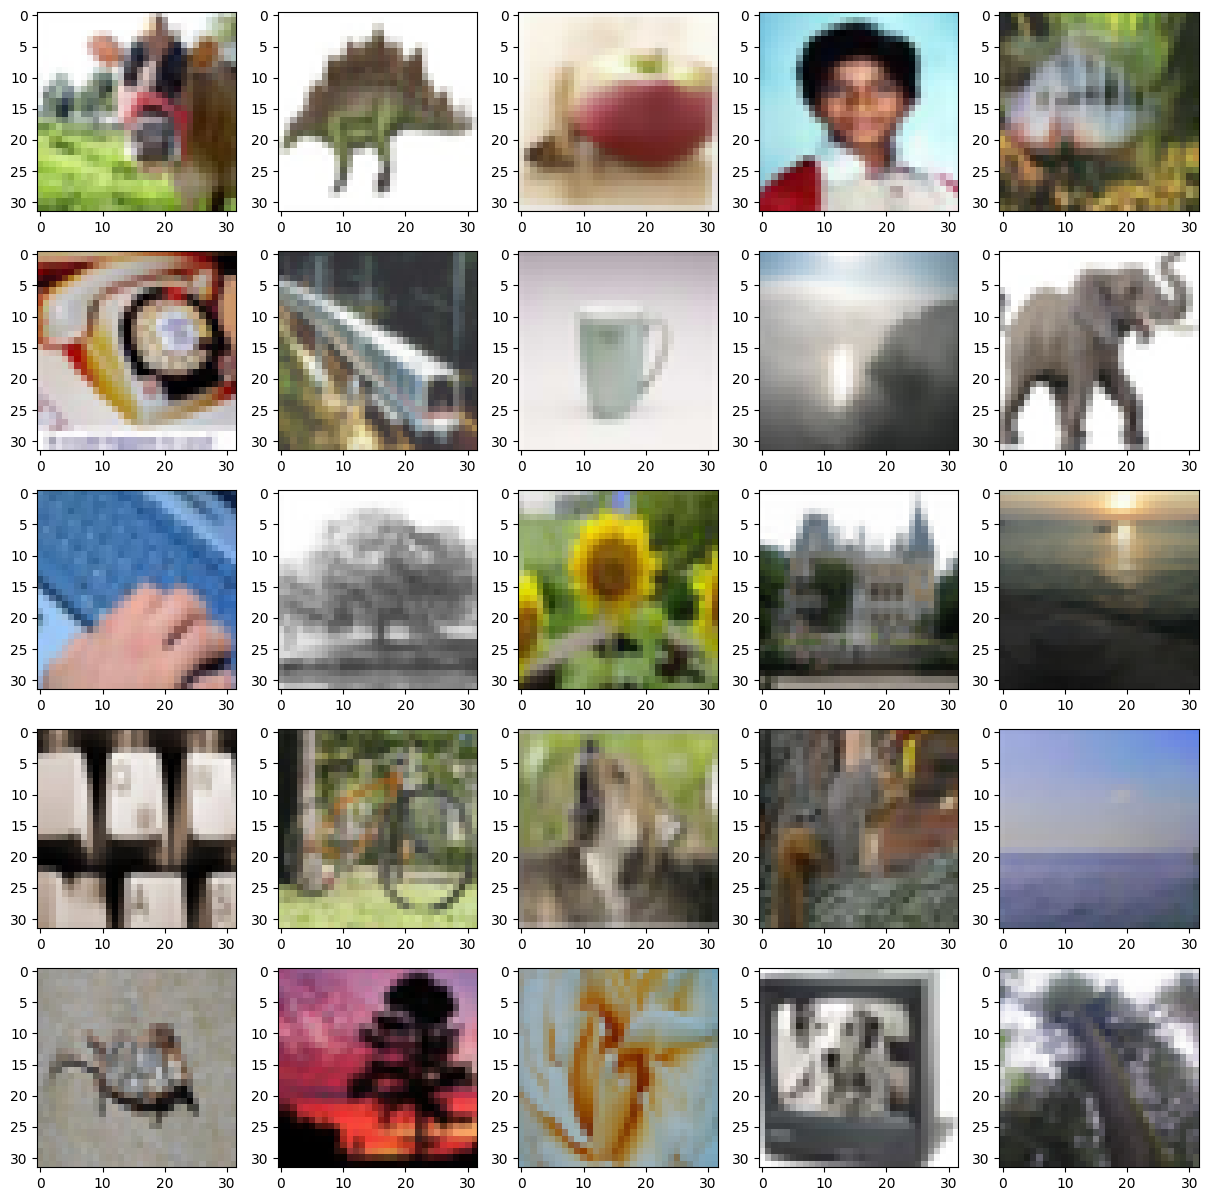

In [6]:
#Plotting first few images
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))
for i in range(25):
  plt.subplot(5,5,i+1)
  image = trnimage[:, :, :, i]
  plt.imshow(image)
plt.show()

In [7]:
#Data Preprocessing
#1) Data reshaping
#2) Data transposing

trnimageReshape = np.reshape(trnimage, (50000, 32, 32, 3))
trnimageTranspose = np.transpose(trnimage, [3,0,1,2])
tstimageReshape = np.reshape(tstimage, (10000, 32, 32, 3))
tstimageTranspose = np.transpose(tstimage, [3,0,1,2])
print('Shape of reshaped train:', trnimageReshape.shape)
print('Shape of transposed train:', trnimageTranspose.shape)

Shape of reshaped train: (50000, 32, 32, 3)
Shape of transposed train: (50000, 32, 32, 3)


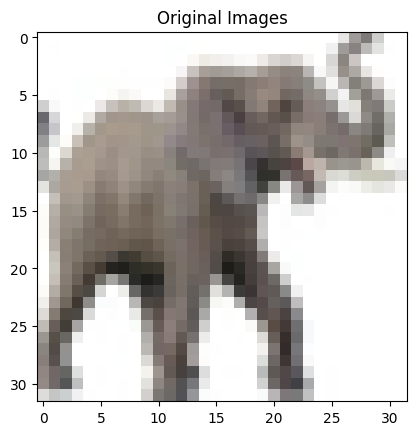

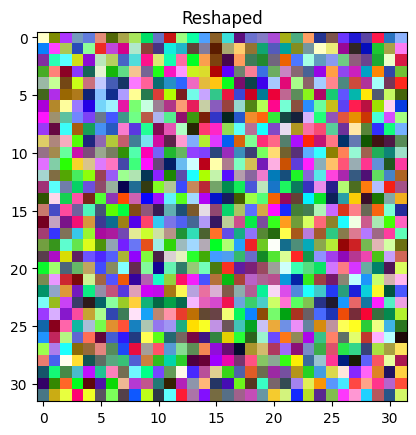

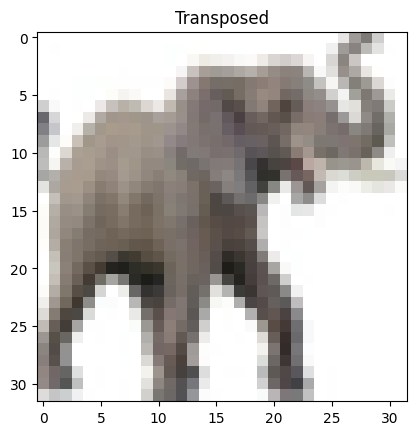

In [8]:
#Finding the difference between different preprocessed images
plt.figure()
plt.imshow(trnimage[:,:,:,9])
plt.title('Original Images')
plt.show()
plt.figure()
plt.imshow(trnimageReshape[9])
plt.title('Reshaped')
plt.show()
plt.figure()
plt.imshow(trnimageTranspose[9])
plt.title('Transposed')
plt.show()

In [9]:
#use of HOG to extract features
import skimage.feature
trnimageHog=[]
for i in range (len(trnimageTranspose)):
  hog_feature, hog_image = skimage.feature.hog(trnimageTranspose[i], channel_axis = 2, orientations=8, pixels_per_cell=[6,6], cells_per_block=[2,2], visualize=True) 
  trnimageHog.append(hog_feature)

tstimageHog=[]
for i in range (len(tstimageTranspose)):
  hog_feature, hog_image = skimage.feature.hog(tstimageTranspose[i], channel_axis = 2, orientations=8, pixels_per_cell=[6,6], cells_per_block=[2,2], visualize=True) 
  tstimageHog.append(hog_feature)
tstimageHog=np.array(tstimageHog)


In [10]:
trnimageHog=np.array(trnimageHog)
tstimageHog=np.array(tstimageHog)
trnimageHog.shape

(50000, 512)

In [61]:
!pip install tensorflow

  Using cached tensorflow-2.11.0-cp310-cp310-win_amd64.whl (1.9 kB)
     -------------------------------------- 266.3/266.3 MB 5.6 MB/s eta 0:00:00
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached libclang-14.0.6-py2.py3-none-win_amd64.whl (14.2 MB)
     ---------------------------------------- 2.6/2.6 MB 9.3 MB/s eta 0:00:00
     ---------------------------------------- 3.7/3.7 MB 8.5 MB/s eta 0:00:00
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
     -------------------------------------- 439.2/439.2 kB 9.1 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 8.6 MB/s eta 0:00:00
     ---------------------------------------- 6.0/6.0 MB 8.5 MB/s eta 0:00:00
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
     ---------------------------------------- 1.7/1.7 MB 8.3 MB/s eta 0:00:00
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
     ---------------------------------------- 124.6/124.6 kB ? eta 0:00:00
     -----


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
#CNN
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization

model = Sequential()
model.add(Conv2D(input_shape=(32, 32, 3), kernel_size=(3, 3), strides=(2, 2), padding='same', filters=32))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='same'))
model.add(Conv2D(kernel_size=(3, 3), padding='same', strides=(2, 2),activation='relu', filters=64))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='same'))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100, activation='softmax'))

model.summary()

model.compile (optimizer='adam',
               loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
               metrics=tf.keras.metrics.SparseCategoricalAccuracy())
model.save('D:/1_Swansea/1_Uni/Big data and machine learning/Coursework/model.h5')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 16, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 64)          18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dense (Dense)               (None, 512)               2

In [12]:
#Data with fine labels are trained
import time
training_start = time.time()
history = model.fit(trnimageTranspose, trnlabel_fine,
                        epochs=20,
                    batch_size=64,
                    validation_split=0.2
                        )

training_stop = time.time()
CNN_fine_training_time = training_stop - training_start

Epoch 1/20
625/625 [==============================] - 29s 43ms/step - loss: 4.0677 - sparse_categorical_accuracy: 0.0796 - val_loss: 3.4103 - val_sparse_categorical_accuracy: 0.1863
Epoch 2/20
625/625 [==============================] - 26s 42ms/step - loss: 3.3847 - sparse_categorical_accuracy: 0.1829 - val_loss: 3.0745 - val_sparse_categorical_accuracy: 0.2495
Epoch 3/20
625/625 [==============================] - 26s 42ms/step - loss: 3.0574 - sparse_categorical_accuracy: 0.2484 - val_loss: 2.8682 - val_sparse_categorical_accuracy: 0.2930
Epoch 4/20
625/625 [==============================] - 26s 42ms/step - loss: 2.8472 - sparse_categorical_accuracy: 0.2859 - val_loss: 2.7181 - val_sparse_categorical_accuracy: 0.3253
Epoch 5/20
625/625 [==============================] - 27s 43ms/step - loss: 2.6604 - sparse_categorical_accuracy: 0.3235 - val_loss: 2.6336 - val_sparse_categorical_accuracy: 0.3377
Epoch 6/20
625/625 [==============================] - 27s 42ms/step - loss: 2.5077 - spars

In [13]:
#Evaluation metrics
evaluation = model.evaluate(tstimageTranspose, tstlabel_fine)
eval = evaluation[1] * 100
print('Test Accuracy on Fine labels :', eval, '%')
print('training time on data with Fine labels:', CNN_fine_training_time/60)


313/313 [==============================] - 2s 6ms/step - loss: 2.7571 - sparse_categorical_accuracy: 0.3903
Test Accuracy on Fine labels : 39.03000056743622 %
training time on data with Fine labels: 8.82537860472997


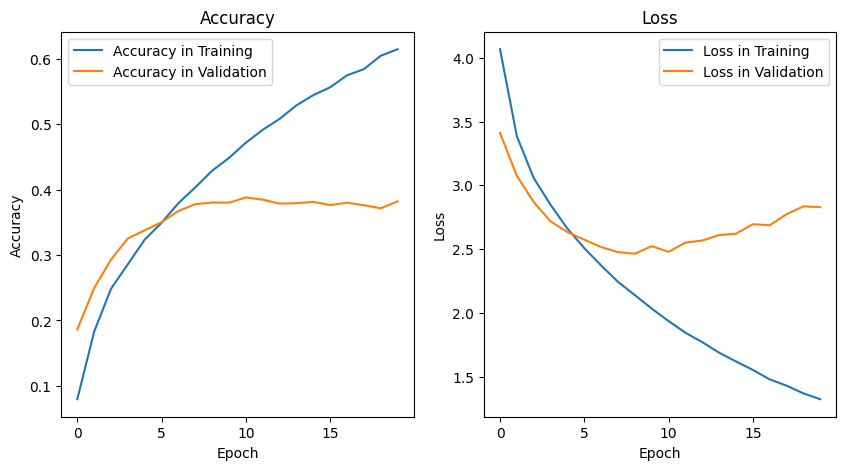

In [14]:
#Plotting the accuracy vs loss graph for fine labels data
plt.figure(figsize=[10,5])
plt.subplot(121)
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Accuracy in Training',
           'Accuracy in Validation'])
plt.title('Accuracy')

plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Loss in Training',
           'Loss in Validation'])
plt.title('Loss')
plt.show()

In [15]:
#use of same model for coarse dataset
tf_model=tf.keras.models.load_model('D:/1_Swansea/1_Uni/Big data and machine learning/Coursework/model.h5')


In [16]:
#coarse label training
training_start = time.time()
hist = tf_model.fit(trnimageTranspose, trnlabel_coarse,
                        epochs=15,
                    batch_size=64,
                    validation_split=0.2
                        )

training_stop = time.time()
CNN_coarse_training_time = training_stop - training_start

Epoch 1/15
625/625 [==============================] - 28s 43ms/step - loss: 2.5837 - sparse_categorical_accuracy: 0.2169 - val_loss: 2.1444 - val_sparse_categorical_accuracy: 0.3469
Epoch 2/15
625/625 [==============================] - 26s 41ms/step - loss: 2.1152 - sparse_categorical_accuracy: 0.3480 - val_loss: 1.9269 - val_sparse_categorical_accuracy: 0.4086
Epoch 3/15
625/625 [==============================] - 26s 41ms/step - loss: 1.9399 - sparse_categorical_accuracy: 0.4023 - val_loss: 1.8421 - val_sparse_categorical_accuracy: 0.4327
Epoch 4/15
625/625 [==============================] - 26s 42ms/step - loss: 1.8123 - sparse_categorical_accuracy: 0.4392 - val_loss: 1.7499 - val_sparse_categorical_accuracy: 0.4605
Epoch 5/15
625/625 [==============================] - 26s 42ms/step - loss: 1.6944 - sparse_categorical_accuracy: 0.4746 - val_loss: 1.6960 - val_sparse_categorical_accuracy: 0.4760
Epoch 6/15
625/625 [==============================] - 26s 42ms/step - loss: 1.6002 - spars

In [17]:
#Accuracy of test data
eval=tf_model.evaluate(tstimageTranspose,tstlabel_coarse)
calc = eval[1] * 100
print('Test Accuracy on Coarse labels :', calc, '%')

313/313 [==============================] - 2s 6ms/step - loss: 1.7810 - sparse_categorical_accuracy: 0.5108
Test Accuracy on Coarse labels : 51.08000040054321 %


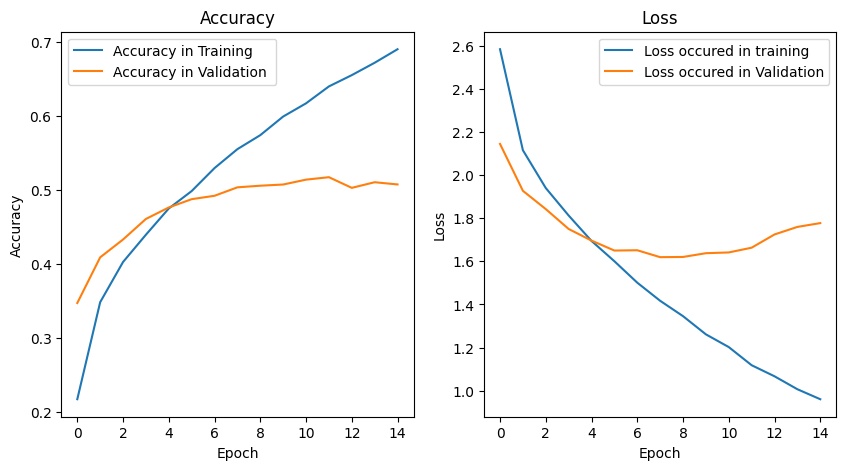

In [18]:
#Plotting the accuracy vs loss graph for coarse labels data
plt.figure(figsize=[10,5])
plt.subplot(121)
plt.plot(hist.history['sparse_categorical_accuracy'])
plt.plot(hist.history['val_sparse_categorical_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Accuracy in Training',
           'Accuracy in Validation '])
plt.title('Accuracy')

plt.subplot(122)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Loss occured in training',
           'Loss occured in Validation'])
plt.title('Loss')
plt.show()

In [19]:
df_fine = np.array(df_fine)
df_coarse = np.array(df_coarse)
labels = df_coarse.flatten()

313/313 [==============================] - 2s 6ms/step


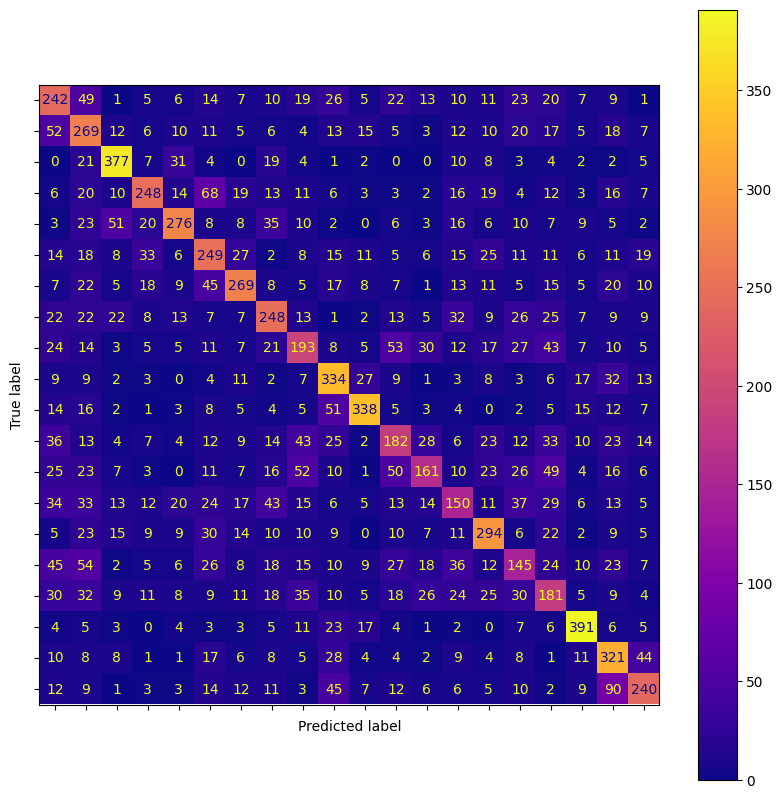

In [20]:
#Confusion Matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
y_predict = tf_model.predict(tstimageTranspose)
cm = confusion_matrix(tstlabel_coarse, np.argmax(y_predict, axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=df_coarse)

fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax,cmap='plasma')

plt.show()

In [23]:
#SVM
from sklearn.svm import SVC
svc = SVC(kernel='poly',degree=10)
svc.fit(trnimageHog, trnlabel_fine)

SVC(degree=10, kernel='poly')

In [24]:
#Finding accuracy for fine label
print('accuracy=', svc.score(tstimageHog, tstlabel_fine))

accuracy= 0.3043


In [25]:
#Coarse labels training
coarse_svc = SVC(kernel='poly',degree=10)
coarse_svc.fit(trnimageHog, trnlabel_coarse)

SVC(degree=10, kernel='poly')

In [26]:
print('accuracy=', coarse_svc.score(tstimageHog, tstlabel_coarse))

accuracy= 0.4187


In [27]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

LDA = LinearDiscriminantAnalysis()
LDA.fit(trnimageHog, trnlabel_fine)


LinearDiscriminantAnalysis()

In [28]:
#Accuracy and training time
print('accuracy=', LDA.score(tstimageHog, tstlabel_fine))

accuracy= 0.2134


In [29]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(solver = 'sag')
LR.fit(trnimageHog, trnlabel_fine)


LogisticRegression(solver='sag')

In [30]:
#Accuracy and training time
print('accuracy=', LR.score(tstimageHog, tstlabel_fine))


accuracy= 0.2317
